In [1]:

# imports
import os
import sys
import types
import json
import base64

# figure size/format
fig_width = 7
fig_height = 5
fig_format = 'retina'
fig_dpi = 96
interactivity = ''
is_shiny = False
is_dashboard = False
plotly_connected = True

# matplotlib defaults / format
try:
  import matplotlib.pyplot as plt
  plt.rcParams['figure.figsize'] = (fig_width, fig_height)
  plt.rcParams['figure.dpi'] = fig_dpi
  plt.rcParams['savefig.dpi'] = "figure"
  from IPython.display import set_matplotlib_formats
  set_matplotlib_formats(fig_format)
except Exception:
  pass

# plotly use connected mode
try:
  import plotly.io as pio
  if plotly_connected:
    pio.renderers.default = "notebook_connected"
  else:
    pio.renderers.default = "notebook"
  for template in pio.templates.keys():
    pio.templates[template].layout.margin = dict(t=30,r=0,b=0,l=0)
except Exception:
  pass

# disable itables paging for dashboards
if is_dashboard:
  try:
    from itables import options
    options.dom = 'fiBrtlp'
    options.maxBytes = 1024 * 1024
    options.language = dict(info = "Showing _TOTAL_ entries")
    options.classes = "display nowrap compact"
    options.paging = False
    options.searching = True
    options.ordering = True
    options.info = True
    options.lengthChange = False
    options.autoWidth = False
    options.responsive = True
    options.keys = True
    options.buttons = []
  except Exception:
    pass
  
  try:
    import altair as alt
    # By default, dashboards will have container sized
    # vega visualizations which allows them to flow reasonably
    theme_sentinel = '_quarto-dashboard-internal'
    def make_theme(name):
        nonTheme = alt.themes._plugins[name]    
        def patch_theme(*args, **kwargs):
            existingTheme = nonTheme()
            if 'height' not in existingTheme:
              existingTheme['height'] = 'container'
            if 'width' not in existingTheme:
              existingTheme['width'] = 'container'

            if 'config' not in existingTheme:
              existingTheme['config'] = dict()
            
            # Configure the default font sizes
            title_font_size = 15
            header_font_size = 13
            axis_font_size = 12
            legend_font_size = 12
            mark_font_size = 12
            tooltip = False

            config = existingTheme['config']

            # The Axis
            if 'axis' not in config:
              config['axis'] = dict()
            axis = config['axis']
            if 'labelFontSize' not in axis:
              axis['labelFontSize'] = axis_font_size
            if 'titleFontSize' not in axis:
              axis['titleFontSize'] = axis_font_size  

            # The legend
            if 'legend' not in config:
              config['legend'] = dict()
            legend = config['legend']
            if 'labelFontSize' not in legend:
              legend['labelFontSize'] = legend_font_size
            if 'titleFontSize' not in legend:
              legend['titleFontSize'] = legend_font_size  

            # The header
            if 'header' not in config:
              config['header'] = dict()
            header = config['header']
            if 'labelFontSize' not in header:
              header['labelFontSize'] = header_font_size
            if 'titleFontSize' not in header:
              header['titleFontSize'] = header_font_size    

            # Title
            if 'title' not in config:
              config['title'] = dict()
            title = config['title']
            if 'fontSize' not in title:
              title['fontSize'] = title_font_size

            # Marks
            if 'mark' not in config:
              config['mark'] = dict()
            mark = config['mark']
            if 'fontSize' not in mark:
              mark['fontSize'] = mark_font_size

            # Mark tooltips
            if tooltip and 'tooltip' not in mark:
              mark['tooltip'] = dict(content="encoding")

            return existingTheme
            
        return patch_theme

    # We can only do this once per session
    if theme_sentinel not in alt.themes.names():
      for name in alt.themes.names():
        alt.themes.register(name, make_theme(name))
      
      # register a sentinel theme so we only do this once
      alt.themes.register(theme_sentinel, make_theme('default'))
      alt.themes.enable('default')

  except Exception:
    pass

# enable pandas latex repr when targeting pdfs
try:
  import pandas as pd
  if fig_format == 'pdf':
    pd.set_option('display.latex.repr', True)
except Exception:
  pass

# interactivity
if interactivity:
  from IPython.core.interactiveshell import InteractiveShell
  InteractiveShell.ast_node_interactivity = interactivity

# NOTE: the kernel_deps code is repeated in the cleanup.py file
# (we can't easily share this code b/c of the way it is run).
# If you edit this code also edit the same code in cleanup.py!

# output kernel dependencies
kernel_deps = dict()
for module in list(sys.modules.values()):
  # Some modules play games with sys.modules (e.g. email/__init__.py
  # in the standard library), and occasionally this can cause strange
  # failures in getattr.  Just ignore anything that's not an ordinary
  # module.
  if not isinstance(module, types.ModuleType):
    continue
  path = getattr(module, "__file__", None)
  if not path:
    continue
  if path.endswith(".pyc") or path.endswith(".pyo"):
    path = path[:-1]
  if not os.path.exists(path):
    continue
  kernel_deps[path] = os.stat(path).st_mtime
print(json.dumps(kernel_deps))

# set run_path if requested
run_path = 'L1VzZXJzL2xhdXJlbnQvTmV4dGNsb3VkL0xBVVJFTlQvTElWUkVTL3NpdGVfcmVncmVzc2lvbl9weXRob24vY29kZXM='
if run_path:
  # hex-decode the path
  run_path = base64.b64decode(run_path.encode("utf-8")).decode("utf-8")
  os.chdir(run_path)

# reset state
%reset

# shiny
# Checking for shiny by using False directly because we're after the %reset. We don't want
# to set a variable that stays in global scope.
if False:
  try:
    import htmltools as _htmltools
    import ast as _ast

    _htmltools.html_dependency_render_mode = "json"

    # This decorator will be added to all function definitions
    def _display_if_has_repr_html(x):
      try:
        # IPython 7.14 preferred import
        from IPython.display import display, HTML
      except:
        from IPython.core.display import display, HTML

      if hasattr(x, '_repr_html_'):
        display(HTML(x._repr_html_()))
      return x

    # ideally we would undo the call to ast_transformers.append
    # at the end of this block whenver an error occurs, we do 
    # this for now as it will only be a problem if the user 
    # switches from shiny to not-shiny mode (and even then likely
    # won't matter)
    import builtins
    builtins._display_if_has_repr_html = _display_if_has_repr_html

    class _FunctionDefReprHtml(_ast.NodeTransformer):
      def visit_FunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

      def visit_AsyncFunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

    ip = get_ipython()
    ip.ast_transformers.append(_FunctionDefReprHtml())

  except:
    pass

def ojs_define(**kwargs):
  import json
  try:
    # IPython 7.14 preferred import
    from IPython.display import display, HTML
  except:
    from IPython.core.display import display, HTML

  # do some minor magic for convenience when handling pandas
  # dataframes
  def convert(v):
    try:
      import pandas as pd
    except ModuleNotFoundError: # don't do the magic when pandas is not available
      return v
    if type(v) == pd.Series:
      v = pd.DataFrame(v)
    if type(v) == pd.DataFrame:
      j = json.loads(v.T.to_json(orient='split'))
      return dict((k,v) for (k,v) in zip(j["index"], j["data"]))
    else:
      return v

  v = dict(contents=list(dict(name=key, value=convert(value)) for (key, value) in kwargs.items()))
  display(HTML('<script type="ojs-define">' + json.dumps(v) + '</script>'), metadata=dict(ojs_define = True))
globals()["ojs_define"] = ojs_define
# globals()["__spec__"] = None

/var/folders/rw/lcb4hvdj44z2zh_2scz_3xgh0000gq/T/ipykernel_15871/1555994662.py:25: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats(fig_format)


{"/opt/miniconda3/lib/python3.12/importlib/_bootstrap.py": 1728049825.3314297, "/opt/miniconda3/lib/python3.12/importlib/_bootstrap_external.py": 1728049825.3348482, "/opt/miniconda3/lib/python3.12/zipimport.py": 1728049824.153947, "/opt/miniconda3/lib/python3.12/codecs.py": 1728049823.7001593, "/opt/miniconda3/lib/python3.12/encodings/aliases.py": 1728049824.5312598, "/opt/miniconda3/lib/python3.12/encodings/__init__.py": 1728049824.5277886, "/opt/miniconda3/lib/python3.12/encodings/utf_8.py": 1728049824.9295616, "/opt/miniconda3/lib/python3.12/abc.py": 1728049823.647853, "/opt/miniconda3/lib/python3.12/io.py": 1728049823.8195863, "/opt/miniconda3/lib/python3.12/stat.py": 1728049824.0119774, "/opt/miniconda3/lib/python3.12/_collections_abc.py": 1728049823.6009316, "/opt/miniconda3/lib/python3.12/genericpath.py": 1728049823.7784452, "/opt/miniconda3/lib/python3.12/posixpath.py": 1728049823.912881, "/opt/miniconda3/lib/python3.12/os.py": 1728049823.8794641, "/opt/miniconda3/lib/python3.

In [2]:
import pandas as pd; import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.graphics import regressionplots
from statsmodels.graphics.api import interaction_plot
import pandas as pd

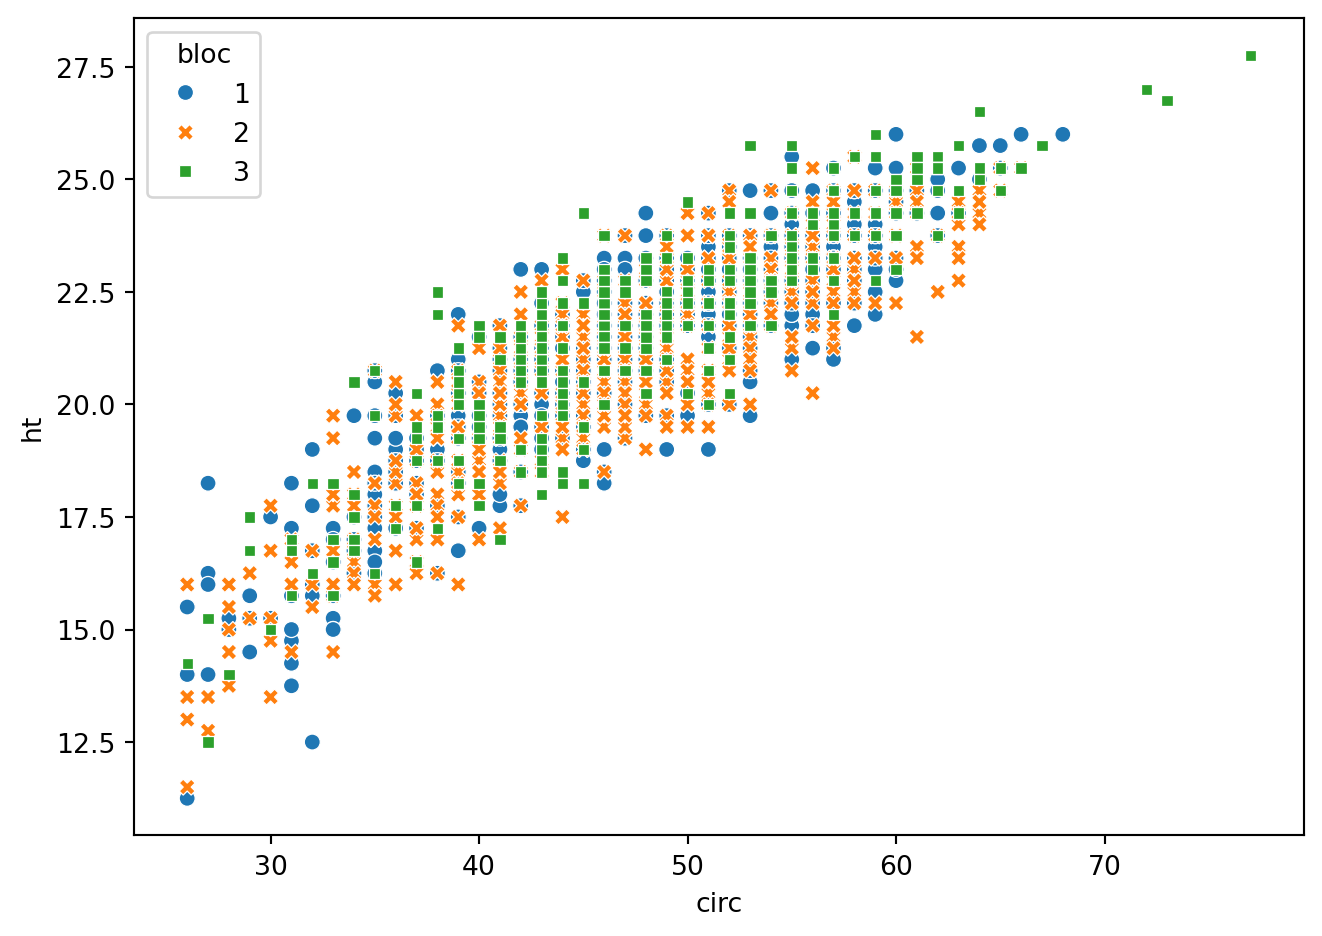

In [3]:
fig = plt.figure()
eucalypt = pd.read_csv("../donnees/eucalyptus.txt", header = 0, sep = ";")
eucalypt["bloc"] = eucalypt["bloc"].astype("category")
sns.scatterplot(data=eucalypt, x="circ", y="ht", hue="bloc",style='bloc')
fig.tight_layout()

EST
NORD
OUEST
SUD


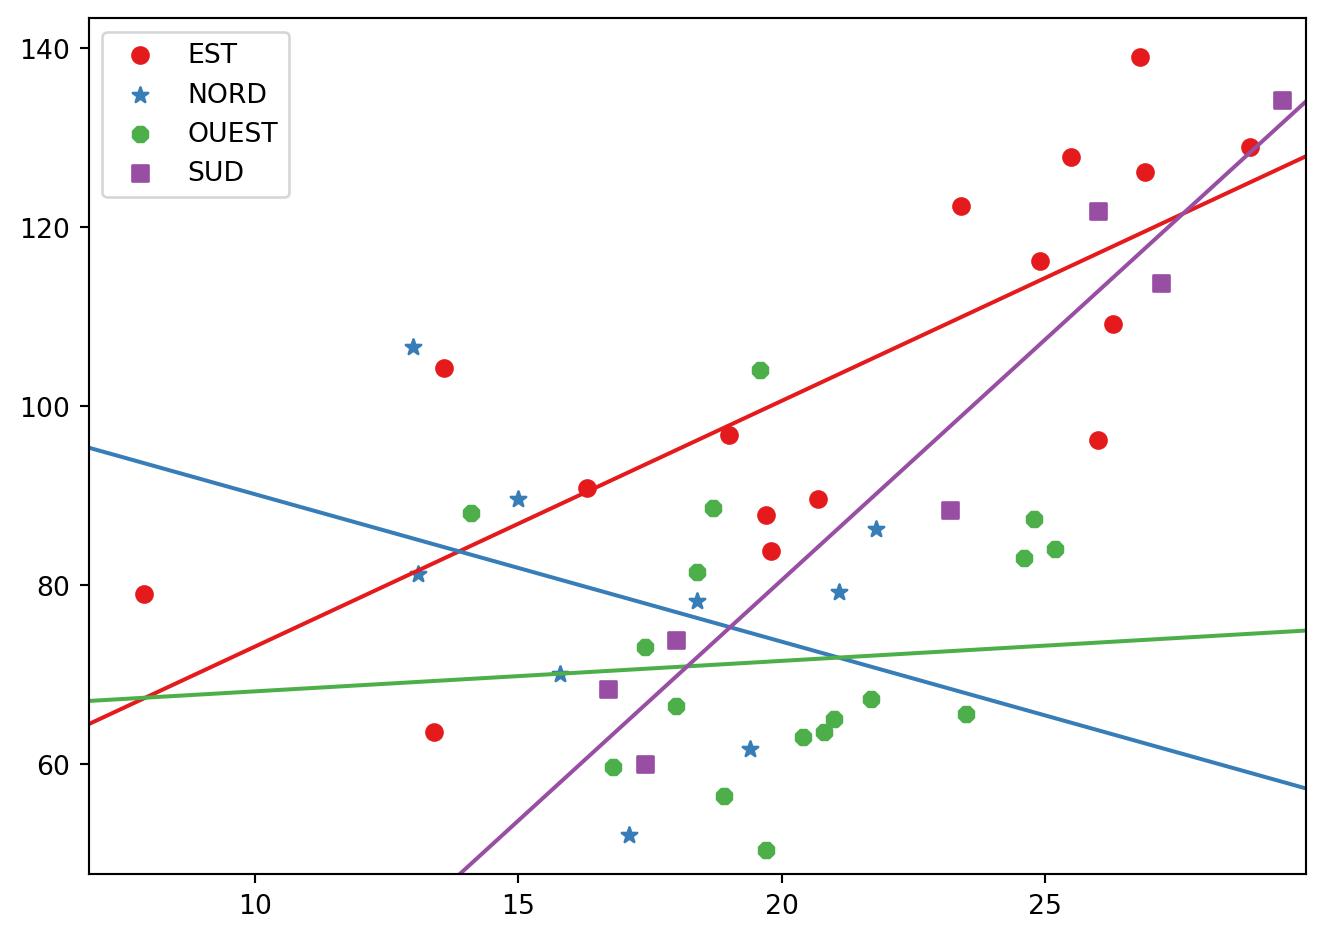

In [4]:
ozone = pd.read_csv("../donnees/ozone.txt", header = 0, sep = ";")
ozone["vent"]=ozone["vent"].astype("category")


niveau = ozone["vent"].cat.categories
cc = cm.Set1(range(niveau.size))
mm = ["o","*","8","s"]
fig, ax = plt.subplots()
for i, val in enumerate(niveau):
    print(val)
    reg = smf.ols("O3 ~ 1 + T12",data=ozone.loc[ozone["vent"]==val]).fit()
    plt.scatter(ozone.loc[ozone["vent"]==val,"T12"],ozone.loc[ozone["vent"]==val,"O3"],
                color=cc[i],label=val, marker=mm[i])
    regressionplots.abline_plot(model_results=reg, ax=ax, color=cc[i])

plt.legend()
fig.tight_layout()

In [5]:
mod1b = smf.ols('O3 ~ -1 + vent + T12:vent', data = ozone).fit()
mod1b.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     O3   R-squared:                       0.675
Model:                            OLS   Adj. R-squared:                  0.621
Method:                 Least Squares   F-statistic:                     12.48
Date:                Fri, 31 Jan 2025   Prob (F-statistic):           1.61e-08
Time:                        16:29:15   Log-Likelihood:                -201.01
No. Observations:                  50   AIC:                             418.0
Df Residuals:                      42   BIC:                             433.3
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
vent[EST]          45.6090     13.934      3.273      0.002      17.488      73.730
vent[NORD]        106.6345     28.034      3.804      0.000      50.059     163.209
vent[OUEST]        64.6840     24.621      2.627      0.012      14.997     114.371
vent[SUD]         -27.0602     26.539     -1.020      0.314     -80.618      26.498
T12:vent[EST]       2.7480      0.634      4.333      0.000       1.468       4.028
T12:vent[NORD]     -1.6491      1.606     -1.027      0.310      -4.890       1.592
T12:vent[OUEST]     0.3407      1.205      0.283      0.779      -2.091       2.772
T12:vent[SUD]       5.3786      1.150      4.678      0.000       3.058       7.699
==============================================================================
Omnibus:                        0.276   Durbin-Watson:                   1.561
Prob(Omnibus):                  0.871   Jarque-Bera (JB):                0.465
Skew:                           0.007   Prob(JB):                        0.793
Kurtosis:                       2.528   Cond. No.                         168.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [6]:
mod1 =smf.ols('O3 ~ vent + T12:vent', data = ozone).fit()
mod1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     O3   R-squared:                       0.675
Model:                            OLS   Adj. R-squared:                  0.621
Method:                 Least Squares   F-statistic:                     12.48
Date:                Fri, 31 Jan 2025   Prob (F-statistic):           1.61e-08
Time:                        16:29:15   Log-Likelihood:                -201.01
No. Observations:                  50   AIC:                             418.0
Df Residuals:                      42   BIC:                             433.3
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          45.6090     13.934      3.273      0.002      17.488      73.730
vent[T.NORD]       61.0255     31.306      1.949      0.058      -2.153     124.204
vent[T.OUEST]      19.0751     28.290      0.674      0.504     -38.017      76.168
vent[T.SUD]       -72.6691     29.975     -2.424      0.020    -133.160     -12.178
T12:vent[EST]       2.7480      0.634      4.333      0.000       1.468       4.028
T12:vent[NORD]     -1.6491      1.606     -1.027      0.310      -4.890       1.592
T12:vent[OUEST]     0.3407      1.205      0.283      0.779      -2.091       2.772
T12:vent[SUD]       5.3786      1.150      4.678      0.000       3.058       7.699
==============================================================================
Omnibus:                        0.276   Durbin-Watson:                   1.561
Prob(Omnibus):                  0.871   Jarque-Bera (JB):                0.465
Skew:                           0.007   Prob(JB):                        0.793
Kurtosis:                       2.528   Cond. No.                         223.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [7]:
mod2 = smf.ols('O3 ~ vent + T12', data = ozone).fit()
mod2b = smf.ols('O3 ~ -1 + vent + T12', data = ozone).fit()
mod3 = smf.ols('O3 ~ vent:T12', data = ozone).fit()

round(sm.stats.anova_lm(mod2,mod1),3)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,45.0,12611.951,0.0,NaN,NaN,NaN
1,42.0,9087.431,3.0,3524.521,5.43,0.003


In [8]:
round(sm.stats.anova_lm(mod3,mod1),3)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,45.0,11864.057,0.0,NaN,NaN,NaN
1,42.0,9087.431,3.0,2776.626,4.278,0.01


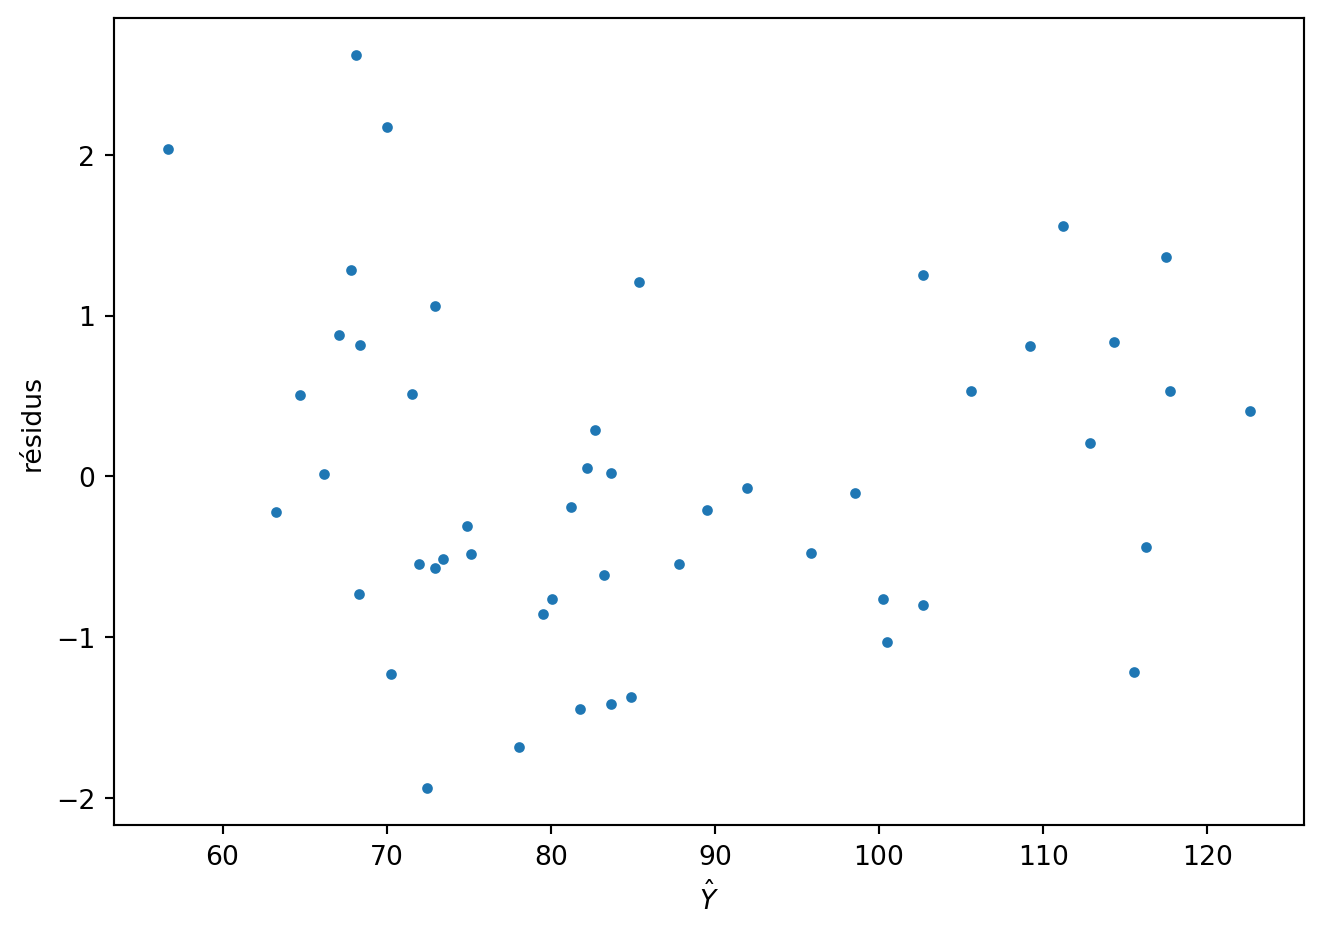

In [9]:
infl = mod2.get_influence()
fig = plt.figure()
plt.plot(mod2.fittedvalues,infl.resid_studentized_external,".")
plt.ylabel('résidus')
plt.xlabel(r'$\hat Y$')
fig.tight_layout()

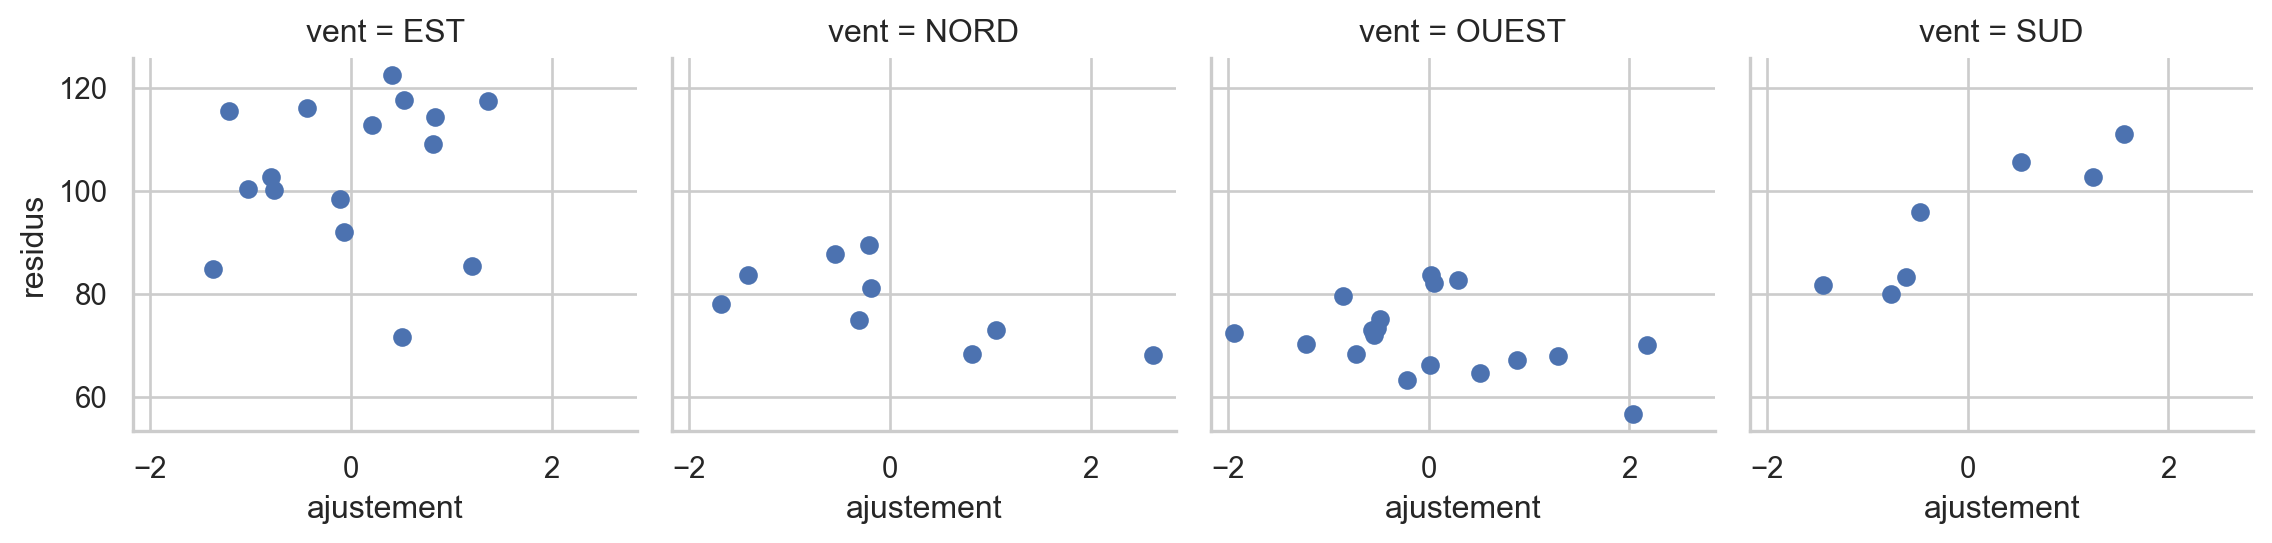

In [10]:
fitted2 = mod2.fittedvalues
sns.set(style="whitegrid")
fitted3 = 1/5* abs(fitted2.round(3))
dfresid = pd.concat([fitted2, pd.Series(infl.resid_studentized_external), ozone[["O3", "vent"]]], axis=1)
dfresid.columns=["residus", "ajustement", "O3", "vent"]
g = sns.FacetGrid(dfresid, col="vent")
g = g.map(plt.scatter, "ajustement", "residus")
fig.tight_layout()

In [11]:
mod = smf.ols('O3 ~ vent + T12 + T12:vent', data = ozone).fit()
mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     O3   R-squared:                       0.675
Model:                            OLS   Adj. R-squared:                  0.621
Method:                 Least Squares   F-statistic:                     12.48
Date:                Fri, 31 Jan 2025   Prob (F-statistic):           1.61e-08
Time:                        16:29:16   Log-Likelihood:                -201.01
No. Observations:                  50   AIC:                             418.0
Df Residuals:                      42   BIC:                             433.3
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            45.6090     13.934      3.273      0.002      17.488      73.730
vent[T.NORD]         61.0255     31.306      1.949      0.058      -2.153     124.204
vent[T.OUEST]        19.0751     28.290      0.674      0.504     -38.017      76.168
vent[T.SUD]         -72.6691     29.975     -2.424      0.020    -133.160     -12.178
T12                   2.7480      0.634      4.333      0.000       1.468       4.028
T12:vent[T.NORD]     -4.3971      1.726     -2.547      0.015      -7.881      -0.913
T12:vent[T.OUEST]    -2.4073      1.361     -1.768      0.084      -5.155       0.340
T12:vent[T.SUD]       2.6306      1.313      2.004      0.052      -0.019       5.280
==============================================================================
Omnibus:                        0.276   Durbin-Watson:                   1.561
Prob(Omnibus):                  0.871   Jarque-Bera (JB):                0.465
Skew:                           0.007   Prob(JB):                        0.793
Kurtosis:                       2.528   Cond. No.                         407.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [12]:
eucalypt = pd.read_csv("../donnees/eucalyptus.txt", header = 0, sep = ";")
eucalypt["bloc"] = eucalypt["bloc"].astype("category")
m_complet = smf.ols("ht ~ - 1 + bloc + bloc:circ", data = eucalypt).fit()
m_pente = smf.ols("ht ~  - 1 + bloc + circ", data = eucalypt).fit()
m_ordonne = smf.ols("ht ~ 1 + bloc:circ", data = eucalypt).fit()
sm.stats.anova_lm(m_pente, m_complet)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,1425.0,2005.895987,0.0,NaN,NaN,NaN
1,1423.0,2005.048468,2.0,0.847519,0.300746,0.740313


In [13]:
round(sm.stats.anova_lm(m_ordonne, m_complet),3)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,1425.0,2009.213,0.0,NaN,NaN,NaN
1,1423.0,2005.048,2.0,4.165,1.478,0.228


In [14]:
m_simple = smf.ols("ht ~ 1 + circ", data = eucalypt).fit()
round(sm.stats.anova_lm(m_simple,m_pente),3)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,1427.0,2052.084,0.0,NaN,NaN,NaN
1,1425.0,2005.896,2.0,46.188,16.406,0.0


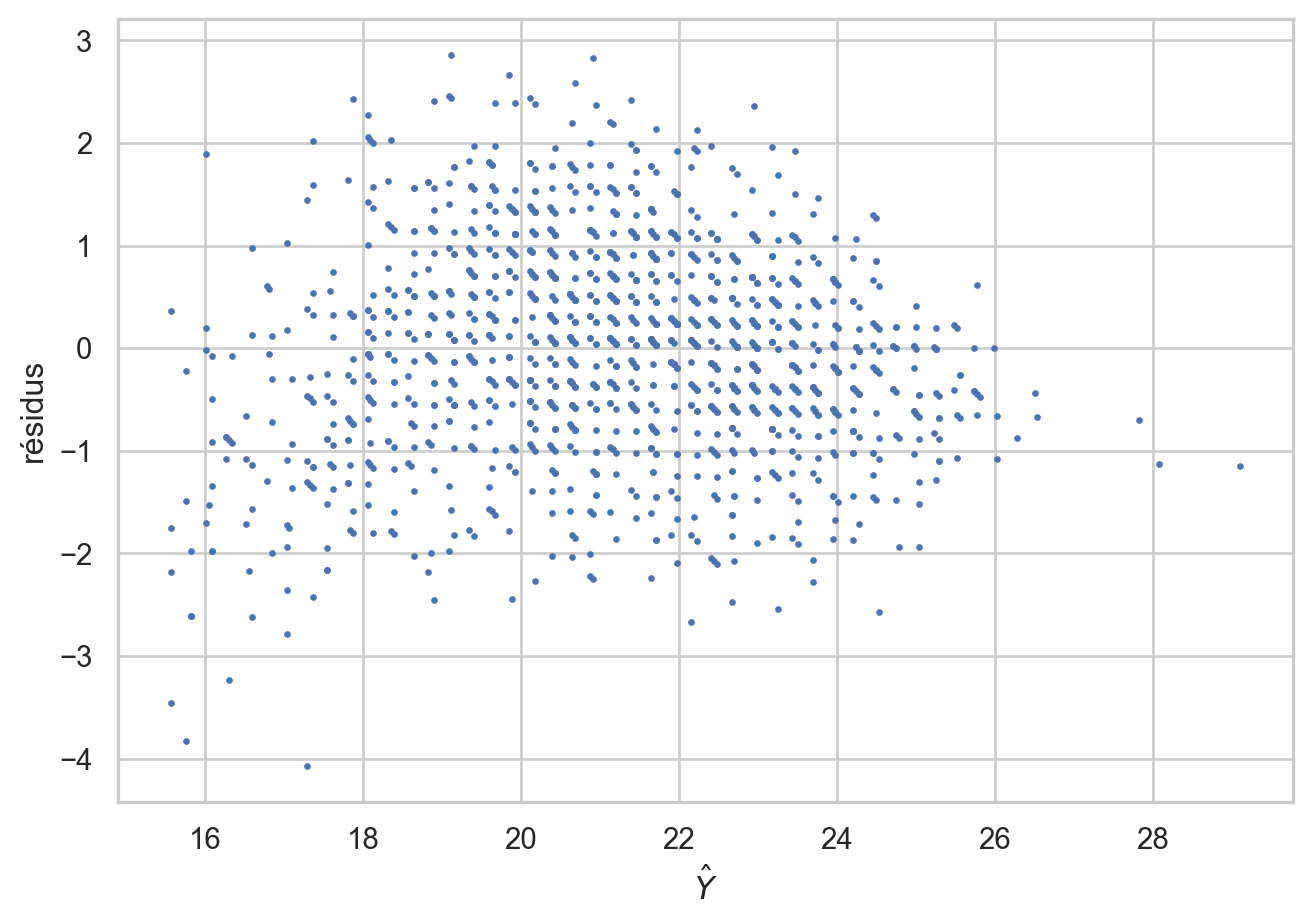

In [15]:
plt.rc("lines", markersize=3) #
infl = m_pente.get_influence()
fig = plt.figure()
plt.plot(m_pente.fittedvalues,infl.resid_studentized_external,".")
plt.ylabel('résidus')
plt.xlabel(r'$\hat Y$')
fig.tight_layout()

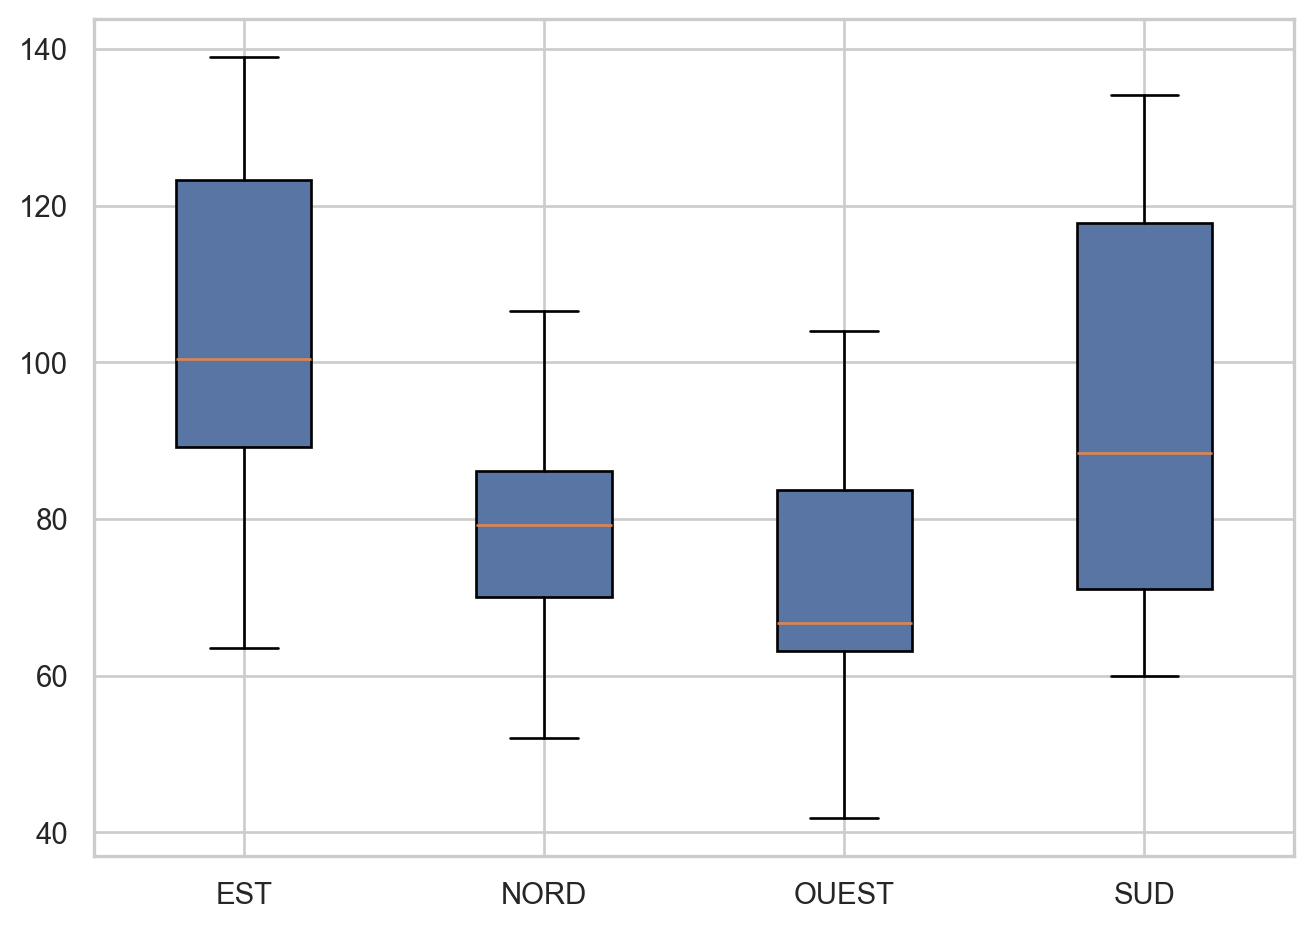

In [16]:
niveau = ozone["vent"].cat.categories
O3_parvent = []
for i in range(niveau.size):
    O3_parvent.append(list(ozone.loc[ozone["vent"]==niveau[i],"O3"]))
    
fig, ax = plt.subplots(1,1)
bplot = ax.boxplot(O3_parvent,patch_artist=True,tick_labels=niveau )
for patch in bplot["boxes"]:
     patch.set_facecolor("#5875a4")

fig.tight_layout()

In [17]:
mod1 = smf.ols("O3~vent-1",data=ozone).fit()
mod1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     O3   R-squared:                       0.352
Model:                            OLS   Adj. R-squared:                  0.310
Method:                 Least Squares   F-statistic:                     8.338
Date:                Fri, 31 Jan 2025   Prob (F-statistic):           0.000156
Time:                        16:29:18   Log-Likelihood:                -218.28
No. Observations:                  50   AIC:                             444.6
Df Residuals:                      46   BIC:                             452.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
vent[EST]     103.8500      4.963     20.923      0.000      93.859     113.841
vent[NORD]     78.2889      6.618     11.830      0.000      64.968      91.610
vent[OUEST]    71.5778      4.680     15.296      0.000      62.158      80.997
vent[SUD]      94.3429      7.504     12.572      0.000      79.238     109.447
==============================================================================
Omnibus:                        1.682   Durbin-Watson:                   1.737
Prob(Omnibus):                  0.431   Jarque-Bera (JB):                1.184
Skew:                           0.083   Prob(JB):                        0.553
Kurtosis:                       2.264   Cond. No.                         1.60
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [18]:
round(sm.stats.anova_lm(mod1),3)

,df,sum_sq,mean_sq,F,PR(>F)
vent,4.0,382244.343,95561.086,242.442,0.0
Residual,46.0,18131.377,394.160,NaN,NaN


In [19]:
mod2 = smf.ols("O3 ~ vent", data = ozone).fit()
mod2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     O3   R-squared:                       0.352
Model:                            OLS   Adj. R-squared:                  0.310
Method:                 Least Squares   F-statistic:                     8.338
Date:                Fri, 31 Jan 2025   Prob (F-statistic):           0.000156
Time:                        16:29:18   Log-Likelihood:                -218.28
No. Observations:                  50   AIC:                             444.6
Df Residuals:                      46   BIC:                             452.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       103.8500      4.963     20.923      0.000      93.859     113.841
vent[T.NORD]    -25.5611      8.272     -3.090      0.003     -42.212      -8.910
vent[T.OUEST]   -32.2722      6.821     -4.731      0.000     -46.003     -18.541
vent[T.SUD]      -9.5071      8.997     -1.057      0.296     -27.617       8.603
==============================================================================
Omnibus:                        1.682   Durbin-Watson:                   1.737
Prob(Omnibus):                  0.431   Jarque-Bera (JB):                1.184
Skew:                           0.083   Prob(JB):                        0.553
Kurtosis:                       2.264   Cond. No.                         4.51
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [20]:
round(sm.stats.anova_lm(mod2),3)

,df,sum_sq,mean_sq,F,PR(>F)
vent,3.0,9859.843,3286.614,8.338,0.0
Residual,46.0,18131.377,394.160,NaN,NaN


In [21]:
smf.ols("O3 ~ C(vent,Treatment)", data = ozone).fit().params

Intercept                      103.850000
C(vent, Treatment)[T.NORD]     -25.561111
C(vent, Treatment)[T.OUEST]    -32.272222
C(vent, Treatment)[T.SUD]       -9.507143
dtype: float64

In [22]:
smf.ols("O3 ~ C(vent, levels=['NORD', 'EST', 'OUEST', 'SUD'])", \
    data = ozone).fit().params

Intercept                                                   78.288889
C(vent, levels=['NORD', 'EST', 'OUEST', 'SUD'])[T.EST]      25.561111
C(vent, levels=['NORD', 'EST', 'OUEST', 'SUD'])[T.OUEST]    -6.711111
C(vent, levels=['NORD', 'EST', 'OUEST', 'SUD'])[T.SUD]      16.053968
dtype: float64

In [23]:
from patsy import dmatrix, ContrastMatrix
II = ozone["vent"].cat.categories.size
nI = ozone["vent"].value_counts()[ozone["vent"].cat.categories]
contr_mat = np.vstack([np.eye(II-1), (-nI[:(II-1)]).divide(nI[-1])])
contraste = ContrastMatrix(contr_mat, ["[a1]", "[a2]", "[a3]"])
mod3 = smf.ols("O3 ~ 1 + C(vent,contraste)",data=ozone).fit()
mod3.summary()

/var/folders/rw/lcb4hvdj44z2zh_2scz_3xgh0000gq/T/ipykernel_15871/1946730329.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  contr_mat = np.vstack([np.eye(II-1), (-nI[:(II-1)]).divide(nI[-1])])


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     O3   R-squared:                       0.352
Model:                            OLS   Adj. R-squared:                  0.310
Method:                 Least Squares   F-statistic:                     8.338
Date:                Fri, 31 Jan 2025   Prob (F-statistic):           0.000156
Time:                        16:29:18   Log-Likelihood:                -218.28
No. Observations:                  50   AIC:                             444.6
Df Residuals:                      46   BIC:                             452.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 86.3000      2.808     30.737      0.000      80.648      91.952
C(vent, contraste)[a1]    17.5500      4.093      4.288      0.000       9.311      25.789
C(vent, contraste)[a2]    -8.0111      5.993     -1.337      0.188     -20.074       4.052
C(vent, contraste)[a3]   -14.7222      3.744     -3.933      0.000     -22.258      -7.187
==============================================================================
Omnibus:                        1.682   Durbin-Watson:                   1.737
Prob(Omnibus):                  0.431   Jarque-Bera (JB):                1.184
Skew:                           0.083   Prob(JB):                        0.553
Kurtosis:                       2.264   Cond. No.                         3.34
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [24]:
round(sm.stats.anova_lm(mod3),3)

,df,sum_sq,mean_sq,F,PR(>F)
"C(vent, contraste)",3.0,9859.843,3286.614,8.338,0.0
Residual,46.0,18131.377,394.160,NaN,NaN


In [25]:
mod4 = smf.ols("O3 ~ 1+ C(vent,Sum)", data = ozone).fit()
round(sm.stats.anova_lm(mod4),3)

,df,sum_sq,mean_sq,F,PR(>F)
"C(vent, Sum)",3.0,9859.843,3286.614,8.338,0.0
Residual,46.0,18131.377,394.160,NaN,NaN


In [26]:
print(ozone)

        Date     O3   T12   T15  Ne12  N12  S12  E12  W12     Vx    O3v  \
0   19960422   63.6  13.4  15.0     7    0    0    3    0   9.35   95.6   
1   19960429   89.6  15.0  15.7     4    3    0    0    0   5.40  100.2   
2   19960506   79.0   7.9  10.1     8    0    0    7    0  19.30  105.6   
3   19960514   81.2  13.1  11.7     7    7    0    0    0  12.60   95.2   
4   19960521   88.0  14.1  16.0     6    0    0    0    6 -20.30   82.8   
5   19960528   68.4  16.7  18.1     7    0    3    0    0  -3.69   71.4   
6   19960605  139.0  26.8  28.2     1    0    0    3    0   8.27   90.0   
7   19960612   78.2  18.4  20.7     7    4    0    0    0   4.93   60.0   
8   19960619  113.8  27.2  27.7     6    0    4    0    0  -4.93  125.8   
9   19960627   41.8  20.6  19.7     8    0    0    0    1  -3.38   62.6   
10  19960704   65.0  21.0  21.1     6    0    0    0    7 -23.68   38.0   
11  19960711   73.0  17.4  22.8     8    0    0    0    2  -6.24   70.8   
12  19960719  126.2  26.9

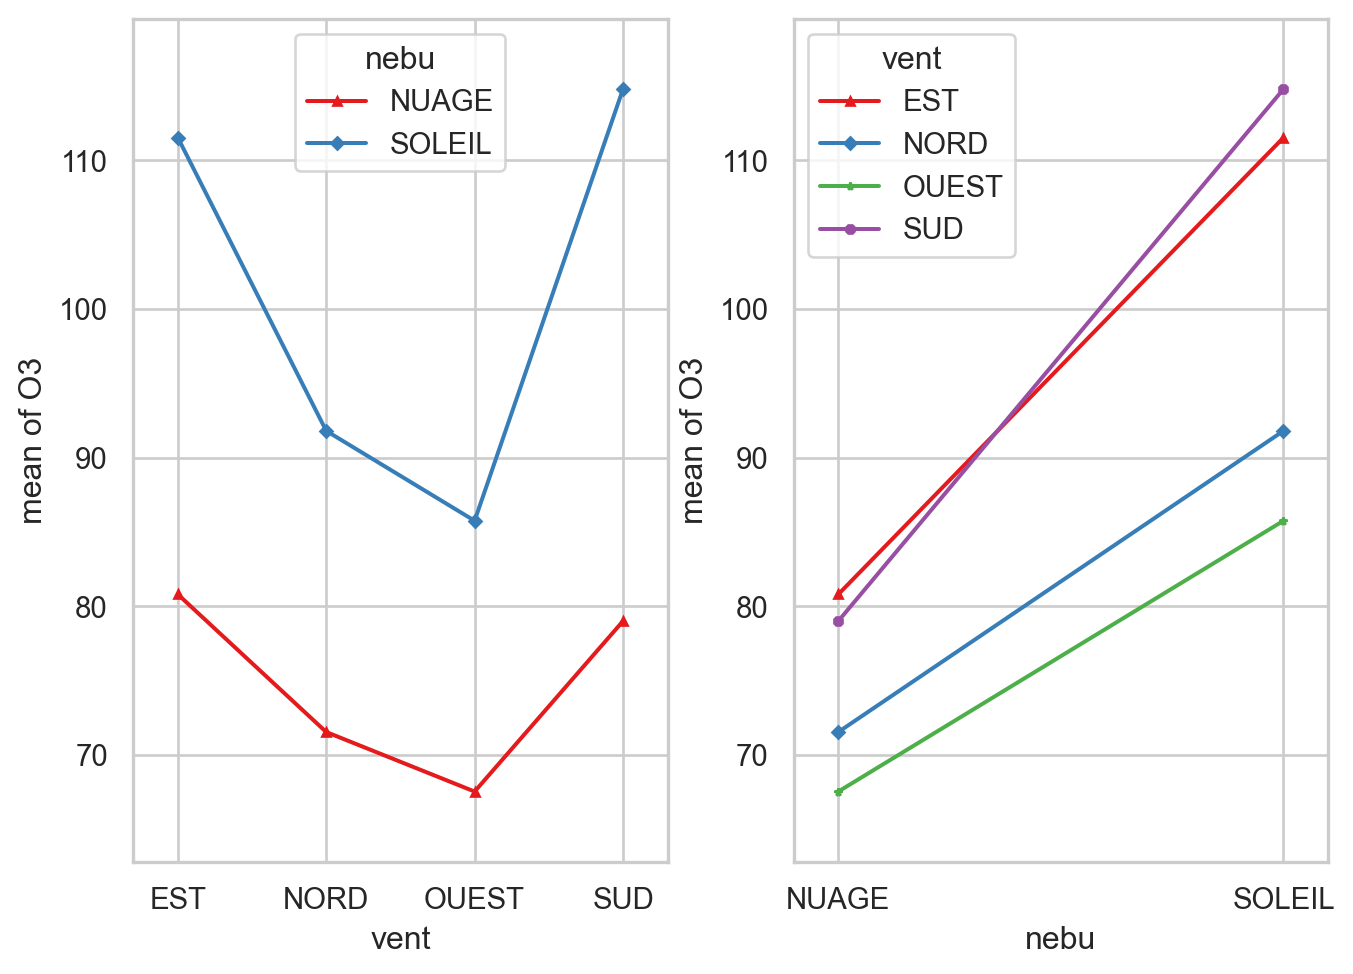

In [27]:
ozone = pd.read_csv("../donnees/ozone.txt", header = 0, sep = ";")
ozone["vent"]=ozone["vent"].astype("category")
ozone["nebu"]=ozone["nebu"].astype("category")
plt.rcParams['font.size'] = '7'
from statsmodels.graphics.api import interaction_plot
cc2 = cm.Set1(range(ozone["vent"].cat.categories.size))
fig, axs = plt.subplots(1,2)
plt.rcParams['font.size'] = '4'
interaction_plot(ozone["vent"].astype("str"), ozone["nebu"].astype("str"), ozone["O3"], colors=cc2[:2], markers=['^','D'],ax=axs[0])
interaction_plot( ozone["nebu"].astype("str"), ozone["vent"].astype("str"),ozone["O3"], colors=cc2, markers=['^','D',"*","8"],ax=axs[1])
fig.tight_layout()

In [28]:
mod1 = smf.ols("O3 ~ vent + nebu + vent:nebu", data = ozone).fit()
mod2 = smf.ols("O3 ~ vent + nebu ", data = ozone).fit()
sm.stats.anova_lm(mod2,mod1)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,45.0,11729.859077,0.0,NaN,NaN,NaN
1,42.0,11246.238571,3.0,483.620506,0.60204,0.617302


In [29]:
mod3 = smf.ols("O3 ~ vent", data = ozone).fit()
round(sm.stats.anova_lm(mod3,mod2),3)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,46.0,18131.377,0.0,NaN,NaN,NaN
1,45.0,11729.859,1.0,6401.518,24.559,0.0


In [30]:
round(sm.stats.anova_lm(mod3, mod2, mod1),3)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,46.0,18131.377,0.0,NaN,NaN,NaN
1,45.0,11729.859,1.0,6401.518,23.907,0.000
2,42.0,11246.239,3.0,483.621,0.602,0.617


In [31]:
round(sm.stats.anova_lm(mod1),3)

,df,sum_sq,mean_sq,F,PR(>F)
vent,3.0,9859.843,3286.614,12.274,0.000
nebu,1.0,6401.518,6401.518,23.907,0.000
vent:nebu,3.0,483.621,161.207,0.602,0.617
Residual,42.0,11246.239,267.768,NaN,NaN
